In [1]:
import os
# print("Current directory:", os.getcwd())

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from plot_utils import set_plot_style, set_spines_black

In [3]:
# Load the data
x = np.loadtxt("DAT_Files/Ex3_Rational.dat")
df = pd.DataFrame(x)
print("Top Five rows in the DAT File:")
print(df.head(5))
print("*"* 60)
print("Number of unique values in each column:")
print(df.nunique())


Top Five rows in the DAT File:
          0        1        2    3    4    5
0  1.000000  2.15608  2.15608  2.0  1.0  0.0
1  0.994777  2.14755  2.14755  1.0  1.0  0.0
2  0.989555  2.13902  2.13902  1.0  1.0  0.0
3  0.984332  2.13049  2.13049  1.0  1.0  0.0
4  0.979109  2.12196  2.12196  1.0  1.0  0.0
************************************************************
Number of unique values in each column:
0    486
1    486
2    486
3      4
4      2
5      1
dtype: int64


In [4]:
# Columns
S = x[:, 0]         
R1 = x[:, 1]
R2 = x[:, 2]
regime = x[:, 3].astype(int)

In [5]:
# Find steady state indices for each regime (and positive R1)
ss1 = np.unique(np.where((regime == 1) & (R1 > 0))[0])
ss2 = np.unique(np.where((regime == 2) & (R1 > 0))[0]) 
ss3 = np.unique(np.where((regime == 3) & (R1 > 0))[0])
ss4 = np.unique(np.where((regime == 4) & (R1 > 0))[0])

In [6]:
# Identify Hopf parameter values from AUTO
hb_params = [ 0.03116791, 0.008723310] 
hb_indices = []
tol = 1e-6
for val in hb_params:
    diffs = np.abs(S - val)
    idx0  = np.argmin(diffs)
    if diffs[idx0] > tol:
        print(f"Closest match to {val} is {S[idx0]} (diff={diffs[idx0]:.2e})")
    else:
        print(f"Found Hopf at S[{idx0}] = {S[idx0]}")
    print(f"regime={regime[idx0]}, R1={R1[idx0]}")
    hb_indices.append(idx0)

print("Final Hopf indices:", hb_indices)

Found Hopf at S[193] = 0.0311679
regime=2, R1=0.526018
Found Hopf at S[213] = 0.00872331
regime=2, R1=0.448719
Final Hopf indices: [np.int64(193), np.int64(213)]


In [7]:
hopf_idx1 = 213
x_hb1, y_hb1 = S[hopf_idx1], R1[hopf_idx1]

In [8]:
hopf_idx2 = 193
x_hb2, y_hb2 = S[hopf_idx2], R1[hopf_idx2]

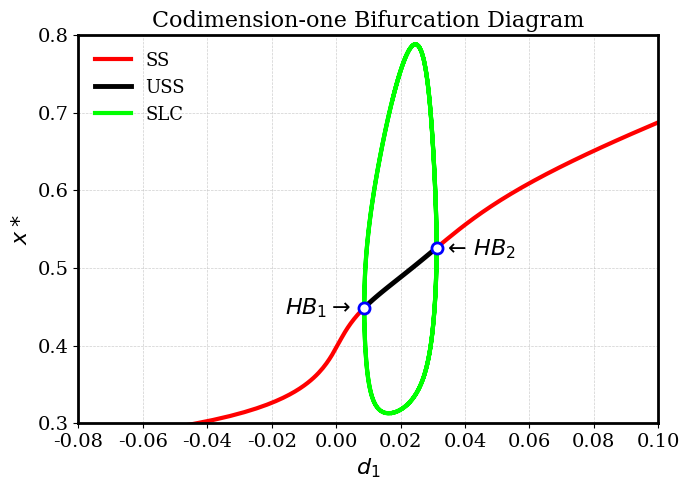

In [9]:
# Initialize Figure
set_plot_style(dpi=100)
plt.figure(figsize=(7, 5))

# Define masks explicitly
red_mask1 = S[ss1] <= x_hb1
red_mask2 = S[ss1] >= x_hb2
black_mask = (S[ss2] >= x_hb1) & (S[ss2] <= x_hb2)

# Regime 1:
plt.plot(S[ss1][red_mask1], R1[ss1][red_mask1], 'r-', linewidth=3, label='SS')
plt.plot(S[ss1][red_mask2], R1[ss1][red_mask2], 'r-', linewidth=3)
# Regime 2:
plt.plot(S[ss2][black_mask], R1[ss2][black_mask], 'k-', linewidth=3.5, label='USS')

# Regime 3: 
neon_lime = '#00FF00'  
plt.plot(S[ss3], R1[ss3], '-', color=neon_lime, linewidth=3, label='SLC')
plt.plot(S[ss3], R2[ss3], '-', color=neon_lime, linewidth=3)

# Regime 4: 
# plt.plot(S[ss4], R1[ss4],  'b-', linewidth=3.5)
# plt.plot(S[ss4], R2[ss4],  'b-', linewidth=3.5)


# Mark and annotate the Hopf points 
## HB1
plt.plot(x_hb1, y_hb1,
         marker='o',
         linestyle='',
         markerfacecolor='white',
         markeredgecolor='blue',
         markersize=8,
         mew=2)

plt.text(
    x_hb1-0.004, y_hb1,
    r'$HB_1 \rightarrow$',
    fontsize=16,
    ha='right', va='center'
)
## HB2
plt.plot(x_hb2, y_hb2,
         marker='o',
         linestyle='',
         markerfacecolor='white',
         markeredgecolor='blue',
         markersize=8,
         mew=2)

plt.text(
    x_hb2+0.002, y_hb2-0.01,
    r'$\leftarrow\,HB_2$',
    fontsize=16,  
)

# Grid, labels, and styling
plt.grid(True, which='both', ls='--', lw=0.5)
plt.title('Codimension-one Bifurcation Diagram')
plt.xlabel(r'$d_1$')
plt.ylabel(r'$x*$')
plt.xlim(-0.08, 0.1)
plt.ylim(0.3, 0.8)
# Thicken and color the axis spines
ax = plt.gca()
set_spines_black(ax) 
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# Add legend
plt.legend(fontsize=13, loc='upper left', frameon=False)

# Save and show
plt.savefig("Plots_3/CDK1_APC_PF_Rational_Bifurcation.pdf", bbox_inches="tight")
plt.show()


In [10]:
##############################################################################################################################################